<a href="https://colab.research.google.com/github/SayuruA/Basics-of-Image-Processing/blob/main/part_1_Intensity_Transforming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(810, 720)


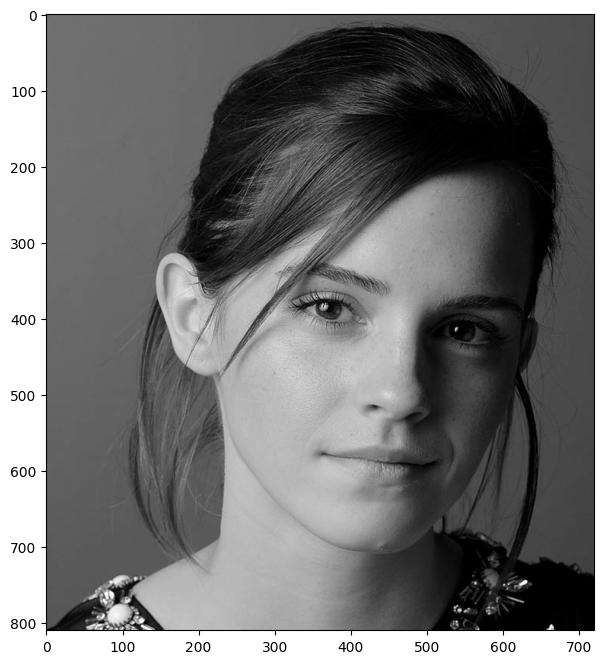

In [85]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

path ="/content/drive/MyDrive/a1images/"

im = cv.imread(path+"emma.jpg", cv.IMREAD_GRAYSCALE)
print(im.shape)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(im, cmap = 'gray', vmin = 0, vmax = 255)
plt.show()

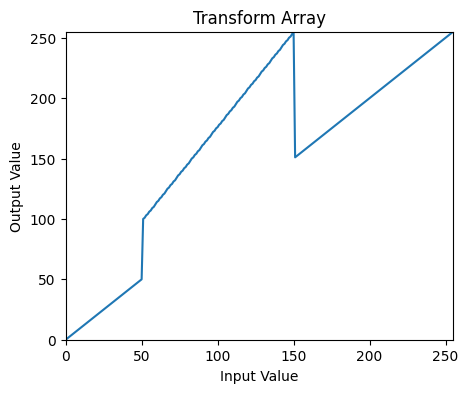

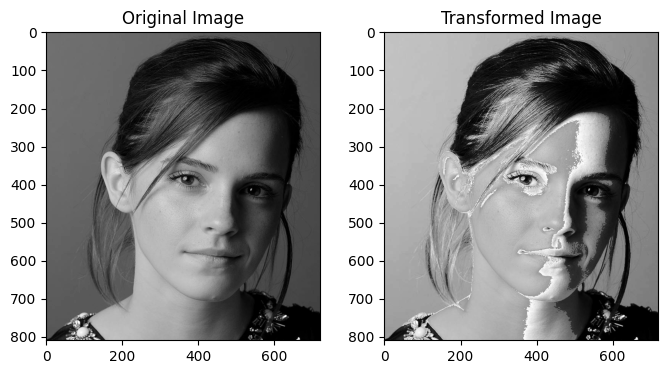

In [84]:
t = np.linspace(0, 255, 256).astype(np.uint8)
t_ = np.linspace(100, 255, 100).astype(np.uint8)

# final transform (51 goes to 100 and 150 goes to 255)
transform = t.copy()
transform[51:151] = t_
im_transformed = cv.LUT(im, transform)

# plot the transform array
plt.figure(figsize=(5, 4))
plt.plot(transform)
plt.xlabel("Input Value")
plt.ylabel("Output Value")
plt.title("Transform Array")
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.show()
print('\n\n')
# show the original and transformed images side by side
fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].imshow
ax[0].set_title("Original Image")
ax[1].imshow(im_transformed, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title("Transformed Image")
plt.show()

(217, 181)


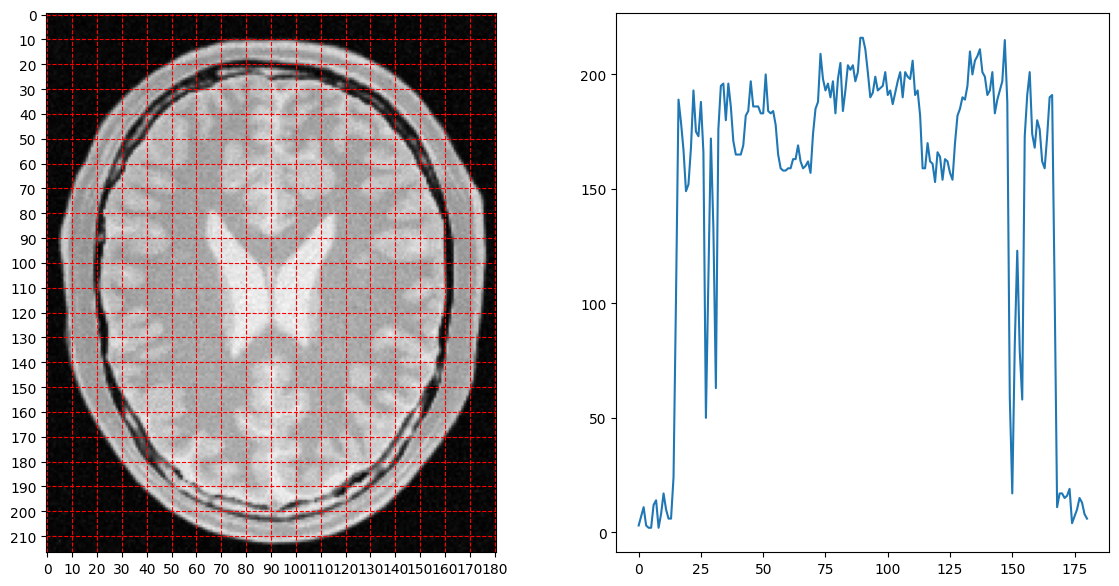

In [145]:
im_brain = cv.imread(path+"brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)
print(im_brain.shape)

fig, ax = plt.subplots(1,2,figsize=(14,7))
ax[0].imshow(im_brain, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_xticks(np.arange(0,181,10))
ax[0].set_yticks(np.arange(0,217,10))
ax[0].grid(color='red',linestyle='--')


i_arr = im_brain[60]
ax[1].plot(i_arr)
plt.show()

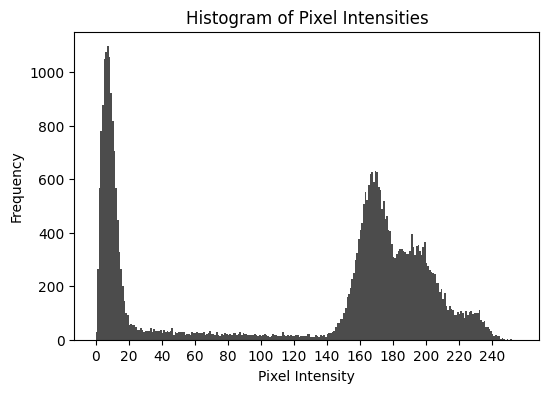

In [104]:
# plot the histogram of im_brain intensities
pixels = im_brain.flatten()

# create a histogram
plt.figure(figsize=(6,4))
plt.hist(pixels, bins=256, range=(0, 256), color='black', alpha=0.7)
plt.xlabel('Pixel Intensity')
plt.xticks(np.arange(0,255,20))
plt.ylabel('Frequency')
plt.title('Histogram of Pixel Intensities')
plt.show()


In [ ]:
im_brain[120][60]

**Observations**


*   The high frequency at the begining corresponds to the background black pixels.
*   The *white matter* is approximately distrbuted in the intensity range from 140 to 180.
* The *grey matter* is approximately distrbuted in the intensity range from 170 to 255.



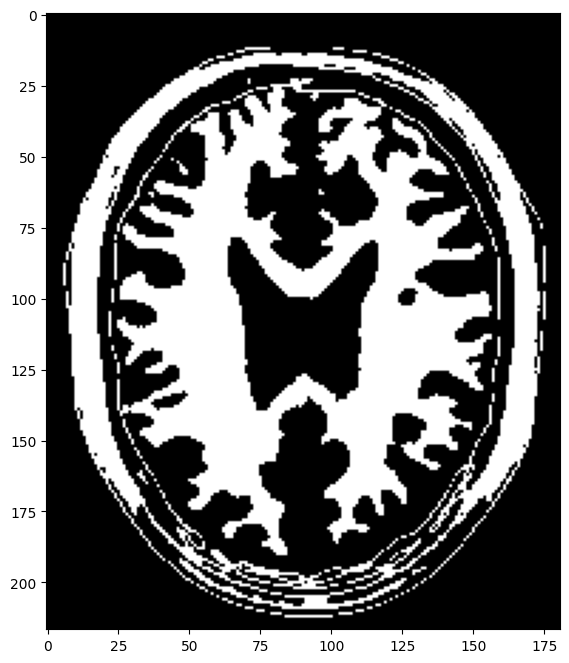

In [186]:
# for white matter
t = np.linspace(0, 255, 256).astype(np.uint8)

wlt = 140
wht = 180
# white matter accentuating transform
t_grey = t.copy()
t_grey[0:wlt] = np.linspace(0, 0, wlt).astype(np.uint8)
t_grey[wlt:wht] = np.linspace(255, 255, wht-wlt).astype(np.uint8)
t_grey[wht:256] = np.linspace(0, 0, 256-wht).astype(np.uint8)

# apply an averaging filter
im_filtered = im_brain.copy()
# kernal = np.ones((3,3), np.float32)/9
# im_filtered = cv.filter2D(im_brain, -1, kernal)

im_white = cv.LUT(im_filtered, t_grey)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(im_white, cmap = 'gray', vmin = 0, vmax = 255)
plt.show()



In [ ]:
def accentuate(im_brain, wlt, wht, filtering ='True'):


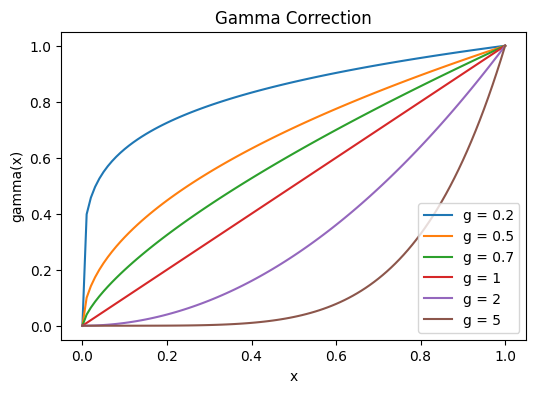

In [149]:
# gamma correction
plt.figure(figsize=(6,4))

for g in [0.2, 0.5, 0.7, 1, 2, 5] :
  x = np.linspace(0,1,101)
  gamma = x**g
  plt.plot(x,gamma)

plt.xlabel('x')
plt.ylabel('gamma(x)')
plt.title('Gamma Correction')
plt.legend(['g = 0.2', 'g = 0.5', 'g = 0.7', 'g = 1', 'g = 2', 'g = 5'])
plt.show()

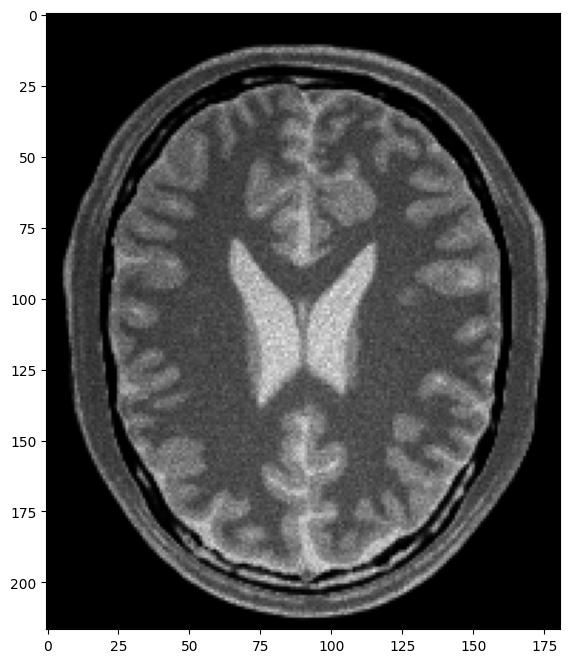

In [162]:
g = 3
x = np.linspace(0,1,256)
gamma = x**g
trnf = (gamma*255).astype(np.uint8)
new = cv.LUT(im_brain, trnf)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(new, cmap = 'gray', vmin = 0, vmax = 255)
plt.show()

In [ ]:
t = np.linspace(0, 255, 256).astype(np.uint8)
# grey accentuating transform
t_grey = t.copy()
t_grey[0:140] = np.linspace(0, 180, 40).astype(np.uint8)
